# Grouping

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 6
pd.options.display.max_columns = 6
pd.options.display.width=60
plt.rcParams['figure.figsize'] = (12, 6)

We'll use the same dataset of beer reviews.

In [14]:
df = pd.read_hdf('data/beer.hdf')

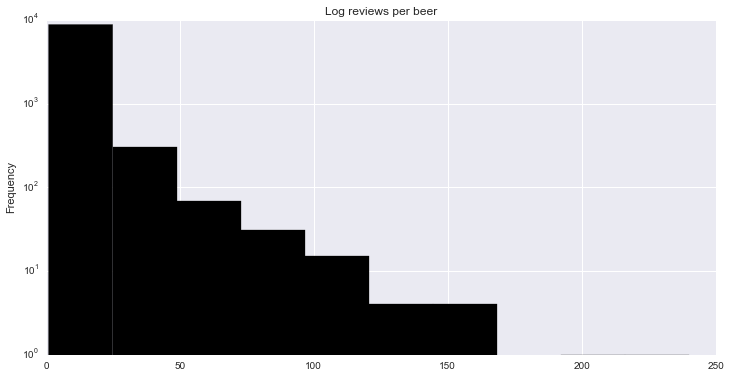

In [15]:
df.beer_id.value_counts().plot(kind='hist', bins=10, color='k', log=True,
                               title='Log reviews per beer');

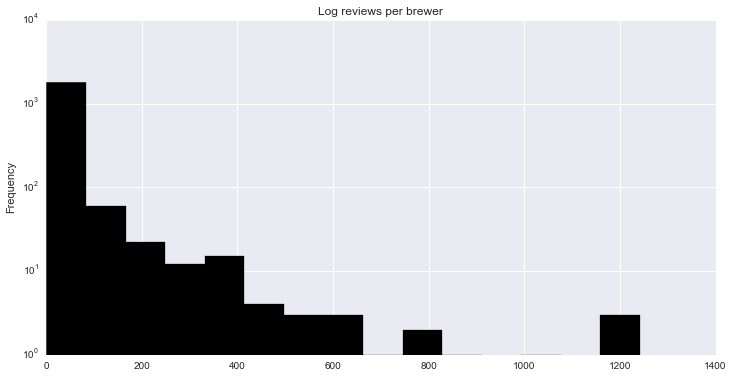

In [16]:
ax = df.brewer_id.value_counts().plot(kind='hist', bins=15, color='k', log=True,
                                      title='Log reviews per brewer');

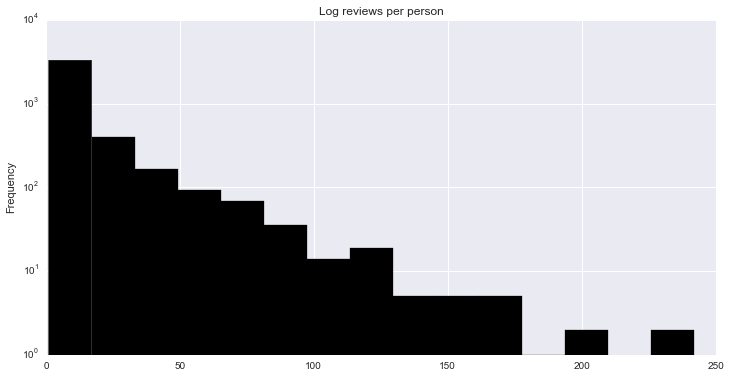

In [17]:
df.profile_name.value_counts().plot(kind='hist', bins=15, color='k', log=True,
                                    title='Log reviews per person');

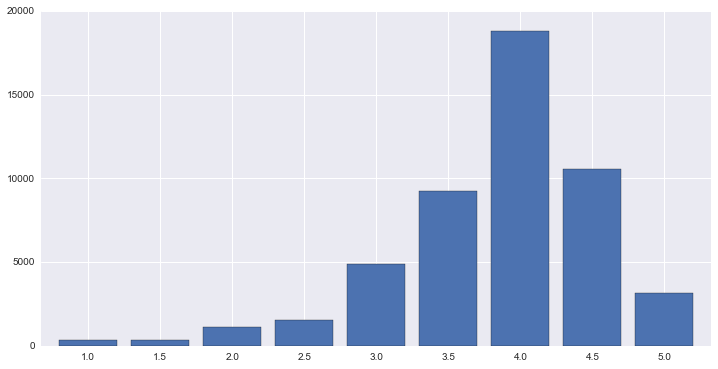

In [18]:
df.review_overall.value_counts().sort_index().plot(kind='bar', width=.8, rot=0);

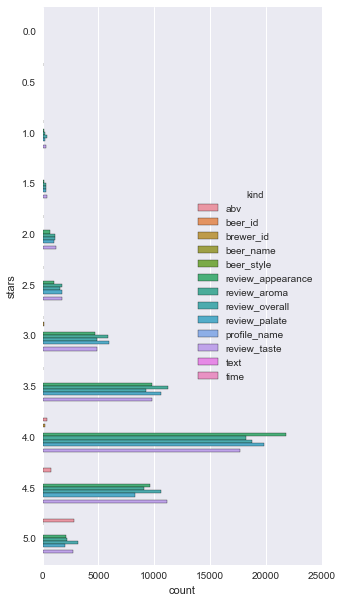

In [19]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.countplot(hue='kind', y='stars', data=(df
                                           .stack()
                                           .reset_index(level=1)
                                           .rename(columns={'level_1': 'kind',
                                                            0: 'stars',})),
              ax=ax, order=np.arange(0, 5.5, .5));

# Groupby

Groupby is a fundamental operation to pandas and data analysis.

The components of a groupby operation are to

1. Split a table into groups
2. Apply a function to each groups
3. Combine the results

In pandas the first step looks like

```python
df.groupby( grouper )
```

`grouper` can be many things

- Series (or string indicating a column in `df`)
- function (to be applied on the index)
- dict : groups by *values*
- `levels=[]`, names of levels in a MultiIndex

In [20]:
gr = df.groupby('beer_style')
gr

Haven't really done anything yet. Just some book-keeping to figure out which **keys** go with which rows. Keys are the things we've grouped by (each `beer_style` in this case).

The last two steps, apply and combine, are just:

In [21]:
gr.agg('mean')

,abv,beer_id,brewer_id,...,review_overall,review_palate,review_taste
beer_style,,,,,,,
Altbier,5.936331,28241.698324,4724.486034,...,3.790503,3.689944,3.703911
American Adjunct Lager,4.880552,9403.638070,1541.485255,...,3.071716,2.733244,2.674933
American Amber / Red Ale,6.135963,23557.469145,3314.523420,...,3.833829,3.694796,3.734944
...,...,...,...,...,...,...,...
Wheatwine,10.766667,44146.641618,2363.132948,...,3.722543,3.872832,3.947977
Winter Warmer,6.520407,22726.750603,2315.001609,...,3.805310,3.703540,3.767900
Witbier,5.850545,29447.023904,3096.407703,...,3.742364,3.567729,3.624170


This says apply the `mean` function to each column. Non-numeric columns (nusiance columns) are excluded. We can also select a subset of columns to perform the aggregation on.

In [32]:
review_columns = ['abv','review_overall','review_appearance','review_palate','review_taste']
gr[review_columns].agg('mean')

,abv,review_overall,review_appearance,review_palate,review_taste
beer_style,,,,,
Altbier,5.936331,3.790503,3.776536,3.689944,3.703911
American Adjunct Lager,4.880552,3.071716,2.783512,2.733244,2.674933
American Amber / Red Ale,6.135963,3.833829,3.836431,3.694796,3.734944
...,...,...,...,...,...
Wheatwine,10.766667,3.722543,3.916185,3.872832,3.947977
Winter Warmer,6.520407,3.805310,3.864441,3.703540,3.767900
Witbier,5.850545,3.742364,3.634794,3.567729,3.624170


`.` attribute lookup works as well.

In [24]:
gr.abv.agg('mean')

beer_style
Altbier                      5.936331
American Adjunct Lager       4.880552
American Amber / Red Ale     6.135963
                              ...    
Wheatwine                   10.766667
Winter Warmer                6.520407
Witbier                      5.850545
Name: abv, dtype: float64

Find the `beer_style` with the greatest variance in `abv`.

In [25]:
df.groupby('beer_style').abv.std().sort_values(ascending=False)


beer_style
American Strong Ale                 3.506721
American Double / Imperial Stout    2.785742
Flanders Oud Bruin                  2.723145
                                      ...   
Gose                                0.185557
Low Alcohol Beer                    0.121006
Happoshu                            0.000000
Name: abv, dtype: float64

Multiple Aggregations on one column

In [26]:
gr['review_aroma'].agg([np.mean, np.std, 'count']).head()

,mean,std,count
beer_style,,,
Altbier,3.581006,0.561276,179
American Adjunct Lager,2.479893,0.732925,746
American Amber / Red Ale,3.653532,0.588231,1345
American Amber / Red Lager,3.120690,0.661131,203
American Barleywine,3.997439,0.511402,781


Single Aggregation on multiple columns

In [33]:
gr[review_columns].mean()

,abv,review_overall,review_appearance,review_palate,review_taste
beer_style,,,,,
Altbier,5.936331,3.790503,3.776536,3.689944,3.703911
American Adjunct Lager,4.880552,3.071716,2.783512,2.733244,2.674933
American Amber / Red Ale,6.135963,3.833829,3.836431,3.694796,3.734944
...,...,...,...,...,...
Wheatwine,10.766667,3.722543,3.916185,3.872832,3.947977
Winter Warmer,6.520407,3.805310,3.864441,3.703540,3.767900
Witbier,5.850545,3.742364,3.634794,3.567729,3.624170


In [34]:
gr[review_columns].agg(['mean', 'count', 'std'])

abv                    ...    review_taste                
                               mean count       std    ...            mean count       std
beer_style                                             ...                                
Altbier                    5.936331   169  1.394085    ...        3.703911   179  0.608033
American Adjunct Lager     4.880552   706  0.405311    ...        2.674933   746  0.815884
American Amber / Red Ale   6.135963  1256  1.299676    ...        3.734944  1345  0.640439
...                             ...   ...       ...    ...             ...   ...       ...
Wheatwine                 10.766667   171  1.043411    ...        3.947977   173  0.624275
Winter Warmer              6.520407  1228  1.079628    ...        3.767900  1243  0.621533
Witbier                    5.850545   716  1.561416    ...        3.624170   753  0.674517

[104 rows x 15 columns]

Hierarchical Indexes in the columns can be awkward to work with, so I'll usually
move a level to the Index with `.stack`.

In [37]:
multi = gr[review_columns].agg(['mean', 'count', 'std']).stack(level=0)
multi

mean  count       std
beer_style                                             
Altbier    abv                5.936331    169  1.394085
           review_overall     3.790503    179  0.674136
           review_appearance  3.776536    179  0.578459
...                                ...    ...       ...
Witbier    review_appearance  3.634794    753  0.581826
           review_palate      3.567729    753  0.615671
           review_taste       3.624170    753  0.674517

[520 rows x 3 columns]

You can group by **levels** of a MultiIndex.

In [38]:
multi.groupby(level='beer_style')['mean'].agg(['min', 'max'])

,min,max
beer_style,,
Altbier,3.689944,5.936331
American Adjunct Lager,2.674933,4.880552
American Amber / Red Ale,3.694796,6.135963
...,...,...
Wheatwine,3.722543,10.766667
Winter Warmer,3.703540,6.520407
Witbier,3.567729,5.850545


Group by **multiple** columns

In [41]:
df.groupby(['brewer_id', 'beer_style'])[review_columns].mean()

abv  review_overall  review_appearance  review_palate  review_taste
brewer_id beer_style                                                                                              
1         Czech Pilsener                  4.389286           3.875           3.589286       3.571429      3.660714
3         American Adjunct Lager          4.200000           3.750           3.250000       3.500000      2.750000
          American Amber / Red Ale        5.200000           3.750           3.694444       3.638889      3.611111
...                                            ...             ...                ...            ...           ...
24964     American Malt Liquor            6.900000           3.250           3.000000       2.750000      3.250000
25680     Euro Pale Lager                 5.300000           3.500           4.000000       3.500000      3.500000
27039     American Double / Imperial IPA  9.990000           4.750           4.500000       4.750000      4.750000

[7580 rows x 5 columns]

### Exercise: Plot the relationship between review length (the `text` column) and average `review_overall`.

- Find the **len**gth of each reivew (remember the `df.text.str` namespace?)
- Group by that Series of review lengths
- I used `style='k.'` in the plot 

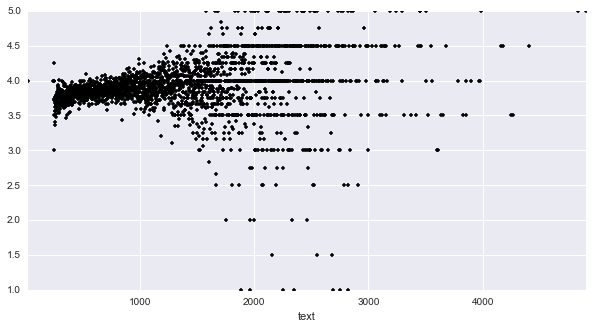

In [42]:
(df.groupby(df.text.str.len())
   .review_overall
   .mean()
   .plot(style='.k', figsize=(10, 5)))


# Categorizing beer

Create our own "kind" of beer, which aggregates `style`.

In [44]:
style = df.beer_style.str.lower()
style

0                          american stout
1                         american porter
2                         german pilsener
                       ...               
49997    american double / imperial stout
49998                    english pale ale
49999              russian imperial stout
Name: beer_style, dtype: object

In [45]:
kinds = ['ipa', 'apa', 'amber ale', 'rye', 'scotch', 'stout', 'barleywine', 'porter', 'brown ale', 'lager', 'pilsner',
         'tripel', 'biter', 'farmhouse', 'malt liquour', 'rice']

In [46]:
expr = '|'.join(['(?P<{name}>{pat})'.format(pat=kind, name=kind.replace(' ', '_')) for kind in kinds])
expr

'(?P<ipa>ipa)|(?P<apa>apa)|(?P<amber_ale>amber ale)|(?P<rye>rye)|(?P<scotch>scotch)|(?P<stout>stout)|(?P<barleywine>barleywine)|(?P<porter>porter)|(?P<brown_ale>brown ale)|(?P<lager>lager)|(?P<pilsner>pilsner)|(?P<tripel>tripel)|(?P<biter>biter)|(?P<farmhouse>farmhouse)|(?P<malt_liquour>malt liquour)|(?P<rice>rice)'

In [47]:
beer_kind = (style.replace({'india pale ale': 'ipa',
                            'american pale ale': 'apa'})
            .str.extract(expr).fillna('').sum(1)
            .str.lower().replace('', 'other'))
beer_kind

0         stout
1        porter
2         other
          ...  
49997     stout
49998     other
49999     stout
dtype: object

In [50]:
beer_kind = beer_kind.astype('category')
beer_kind

0         stout
1        porter
2         other
          ...  
49997     stout
49998     other
49999     stout
dtype: category
Categories (13, object): [apa, barleywine, brown ale, farmhouse, ..., rye, scotch, stout, tripel]

In [51]:
df.groupby(['brewer_id', beer_kind]).review_overall.mean()

brewer_id           
1          other        3.875000
3          apa          3.285714
           brown ale    3.530000
                          ...   
24964      other        3.250000
25680      lager        3.500000
27039      ipa          4.750000
Name: review_overall, dtype: float64

In [52]:
df.groupby(['brewer_id', beer_kind]).beer_id.nunique().unstack(1).fillna(0)

,apa,barleywine,brown ale,...,scotch,stout,tripel
brewer_id,,,,,,,
1,0,0,0,...,0,0,0
3,1,0,3,...,0,0,0
4,0,0,0,...,1,0,2
...,...,...,...,...,...,...,...
24964,0,0,0,...,0,0,0
25680,0,0,0,...,0,0,0
27039,0,0,0,...,0,0,0


We've seen a lot of permutations among number of groupers, number of columns to aggregate, and number of aggregators.
In fact, the `.agg`, which returns one row per group, is just one kind of way to combine the results. The three ways are

- `agg`: one row per results
- `transform`: identicaly shaped output as input
- `apply`: anything goes


# Transform

Combined Series / DataFrame is the same shape as the input. For example, say you want to standardize the reviews by subtracting the mean.

In [54]:
def de_mean(reviews):
    s = reviews - reviews.mean()
    return s

In [55]:
de_mean(df.review_overall)

0        0.65018
1        0.65018
2       -0.84982
          ...   
49997    1.15018
49998    0.15018
49999    1.15018
Name: review_overall, dtype: float64

We can do this at the *person* level with `groupby` and `transform`.

In [62]:
df.groupby('profile_name').transform(de_mean)

,abv,beer_id,brewer_id,...,review_overall,review_palate,review_taste
0,-2.763000,-14386.800000,-250.800000,...,0.500000,-0.100000,0.450000
1,-1.501563,-12613.333333,3168.025641,...,0.397436,0.038462,-0.012821
2,-2.072727,-10567.348485,805.833333,...,-0.803030,-0.568182,-0.287879
...,...,...,...,...,...,...,...
49997,0.400000,4817.388889,1236.833333,...,0.916667,0.777778,0.555556
49998,-1.625862,-36774.032258,-4302.516129,...,-0.112903,-0.838710,-0.774194
49999,2.165500,20759.950000,12161.450000,...,0.925000,0.575000,0.375000


Oftentimes is better to work with the groupby object directly

In [61]:
(df-df.groupby('profile_name').transform('mean')).select_dtypes(exclude=['object'])

,abv,beer_id,brewer_id,...,review_overall,review_palate,review_taste
0,-2.763000,-14386.800000,-250.800000,...,0.500000,-0.100000,0.450000
1,-1.501563,-12613.333333,3168.025641,...,0.397436,0.038462,-0.012821
2,-2.072727,-10567.348485,805.833333,...,-0.803030,-0.568182,-0.287879
...,...,...,...,...,...,...,...
49997,0.400000,4817.388889,1236.833333,...,0.916667,0.777778,0.555556
49998,-1.625862,-36774.032258,-4302.516129,...,-0.112903,-0.838710,-0.774194
49999,2.165500,20759.950000,12161.450000,...,0.925000,0.575000,0.375000


# Resample

Resample is a special kind of groupby operation for when you have a `DatetimeIndex`.

In [63]:
review_times = df.time.value_counts().sort_index()
review_times

2009-10-05 21:31:48    1
2009-10-05 21:32:09    1
2009-10-05 21:32:13    1
                      ..
2009-12-25 17:23:52    1
2009-12-25 17:25:06    1
2009-12-25 17:26:06    1
Name: time, dtype: int64

In [66]:
review_times.index

DatetimeIndex(['2009-10-05 21:31:48',
               '2009-10-05 21:32:09',
               '2009-10-05 21:32:13',
               '2009-10-05 21:32:37',
               '2009-10-05 21:33:14',
               '2009-10-05 21:33:48',
               '2009-10-05 21:34:24',
               '2009-10-05 21:34:29',
               '2009-10-05 21:34:31',
               '2009-10-05 21:35:09', 
               ...
               '2009-12-25 17:00:06',
               '2009-12-25 17:01:35',
               '2009-12-25 17:03:40',
               '2009-12-25 17:10:38',
               '2009-12-25 17:16:40',
               '2009-12-25 17:21:54',
               '2009-12-25 17:23:24',
               '2009-12-25 17:23:52',
               '2009-12-25 17:25:06',
               '2009-12-25 17:26:06'],
              dtype='datetime64[ns]', length=49681, freq=None)

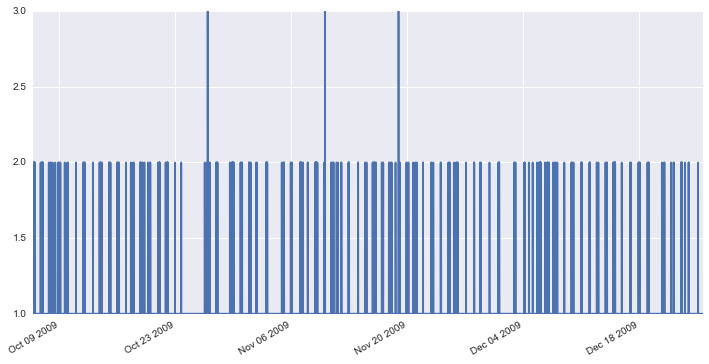

In [67]:
review_times.plot()

Right now the frequency is way to high to be meaningful. `resample` lets you adjust the frequency.

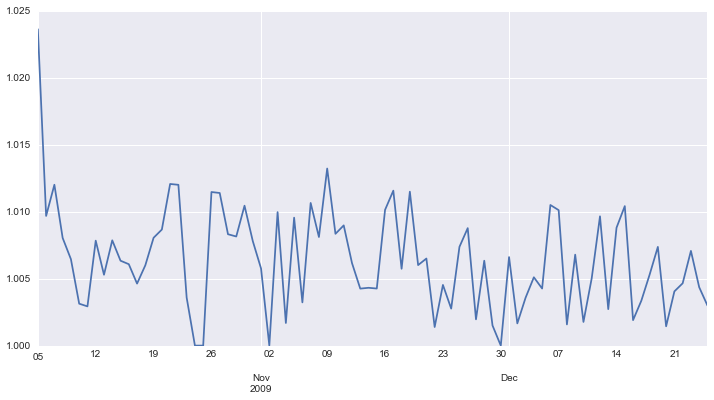

In [68]:
review_times.resample("D").plot()